#revie experiments

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.insert(1, '/its/home/drs25/Documents/GitHub/Quadruped/Code')
sys.path.insert(1, 'C:/Users/dexte/Documents/GitHub/Quadruped/Code')
from CPG import *
datapath="/its/home/drs25/Documents/GitHub/Quadruped/"
datapath="C:/Users/dexte/Documents/GitHub/Quadruped/"

## load in data

In [35]:
best_CPGs=[]
fitnesses=[]
trials=2
for _ in range(1,trials+1):
    for dt in np.arange(0.05,1.5,0.05):
        filename = datapath+'/models/genotypes_dt'+str(dt)+"_"+str(_)
        population=None
        with open(filename+'.pkl', 'rb') as f:
            population = pickle.load(f)
        f_=np.load((filename+'.npy').replace("genotypes","fitnesses"))
        best_geno=np.argmax(f_)
        best_CPGs=population[best_geno]
        fitnesses.append(best_geno)

fitnesses=np.array(fitnesses).reshape(len(np.arange(0.05,1.5,0.05)),trials).T
print(fitnesses.shape)


(2, 29)


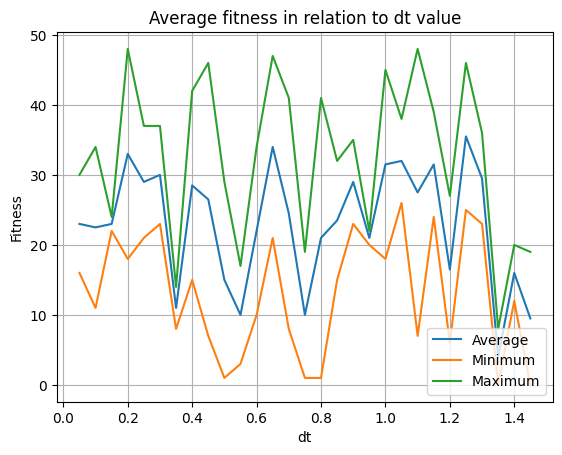

In [38]:
size=len(np.arange(0.05,1.5,0.05))
plt.plot(np.arange(0.05,1.5,0.05),np.average(fitnesses,axis=0),label="Average")
plt.plot(np.arange(0.05,1.5,0.05),np.min(fitnesses,axis=0),label="Minimum")
plt.plot(np.arange(0.05,1.5,0.05),np.max(fitnesses,axis=0),label="Maximum")
plt.xlabel("dt")
plt.ylabel("Fitness")
plt.title("Average fitness in relation to dt value")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()